## 🌐 Connect Colab to Google Drive

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    from google.colab import drive

    drive.mount('/gdrive')
    %cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 2
    !pip install keras_cv

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1rPuqfmPD7NsZJ8nrbnOTfNWKJtu59ajC/Homework 2


## ⚙️ Import Libraries

In [ ]:
# Set seed for reproducibility

seed = 42



# Import necessary libraries

import os

if 'KAGGLE_URL_BASE' in os.environ:
    IN_KAGGLE = True
else:
    IN_KAGGLE = False


# Set environment variables before importing modules

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

os.environ['PYTHONHASHSEED'] = str(seed)

os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'



# Suppress warnings

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.simplefilter(action='ignore', category=Warning)



# Import necessary modules

import logging

import random

import numpy as np



# Set seeds for random number generators in NumPy and Python

np.random.seed(seed)

random.seed(seed)



# Import TensorFlow and Keras

import tensorflow as tf

from tensorflow import keras as tfk

from tensorflow.keras import layers as tfkl



# Set seed for TensorFlow

tf.random.set_seed(seed)

tf.compat.v1.set_random_seed(seed)



# Reduce TensorFlow verbosity

tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)



# Print TensorFlow version

print(tf.__version__)



# Import other libraries

import os

import math

from PIL import Image

from keras import backend as K

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns



# Configure plot display settings

sns.set(font_scale=1.4)

sns.set_style('white')

plt.rc('font', size=14)

%matplotlib inline

2.17.1


## ⏳ Load and Process Data

In [ ]:
if IN_KAGGLE:
    DATASET_PATH = "/kaggle/input/and2l-hw2-mars-ground"
else:
    DATASET_PATH = "data"



training_set = np.load(DATASET_PATH + "/training_set.npy")

test_set = np.load(DATASET_PATH + "/test_set.npy")



X_train = training_set[:, 0]

y_train = training_set[:, 1]

X_test = test_set



X_train = np.expand_dims(X_train, axis=-1)  # Diventa (2615, 64, 128, 1)

y_train = np.expand_dims(y_train, axis=-1)  # Diventa (2615, 64, 128, 1)

X_test = np.expand_dims(X_test, axis=-1)    # Diventa (10022, 64, 128, 1)







print(f"Training X shape: {X_train.shape}")

print(f"Training y shape: {y_train.shape}")

print(f"Test X shape: {X_test.shape}")

Training X shape: (2505, 64, 128, 1)
Training y shape: (2505, 64, 128, 1)
Test X shape: (10022, 64, 128, 1)


In [ ]:
NUM_CLASSES = 5

def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

COLORMAP = create_segmentation_colormap(NUM_CLASSES)

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    colormap = COLORMAP

    # Validate colormap size
    max_label = label.max()
    if max_label >= colormap.shape[0]:
        raise ValueError(f"Label contains value {max_label}, but colormap has only {colormap.shape[0]} colors.")


    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def display_label(label, ax=None):
    """
    Display a label using the colormap.
    """
    colored = apply_colormap(label)
    if ax is None:
        plt.imshow(colored)
    else:
        ax.imshow(colored)

    return ax


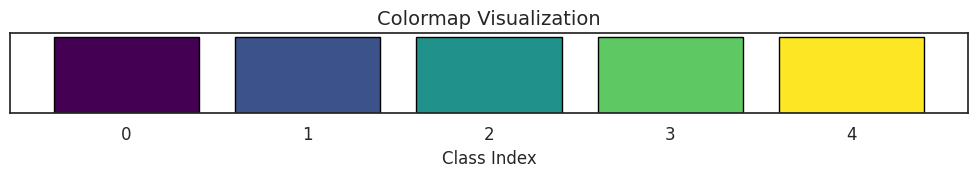

In [ ]:
def visualize_colormap(colormap, num_classes):
    """
    Visualize the given colormap by plotting color swatches with class indices.

    Parameters:
    colormap: numpy.ndarray - The colormap array with shape (num_classes, 3 or 4).
    num_classes: int - The number of classes.
    """
    plt.figure(figsize=(10, 2))

    # Create a horizontal bar for each class
    for i in range(num_classes):
        plt.bar(i, 1, color=colormap[i], edgecolor="black")

    # Add labels for each class
    plt.xticks(range(num_classes), labels=range(num_classes), fontsize=12)
    plt.yticks([])  # Hide y-axis
    plt.title("Colormap Visualization", fontsize=14)
    plt.xlabel("Class Index", fontsize=12)
    plt.tight_layout()
    plt.show()

visualize_colormap(COLORMAP, NUM_CLASSES)

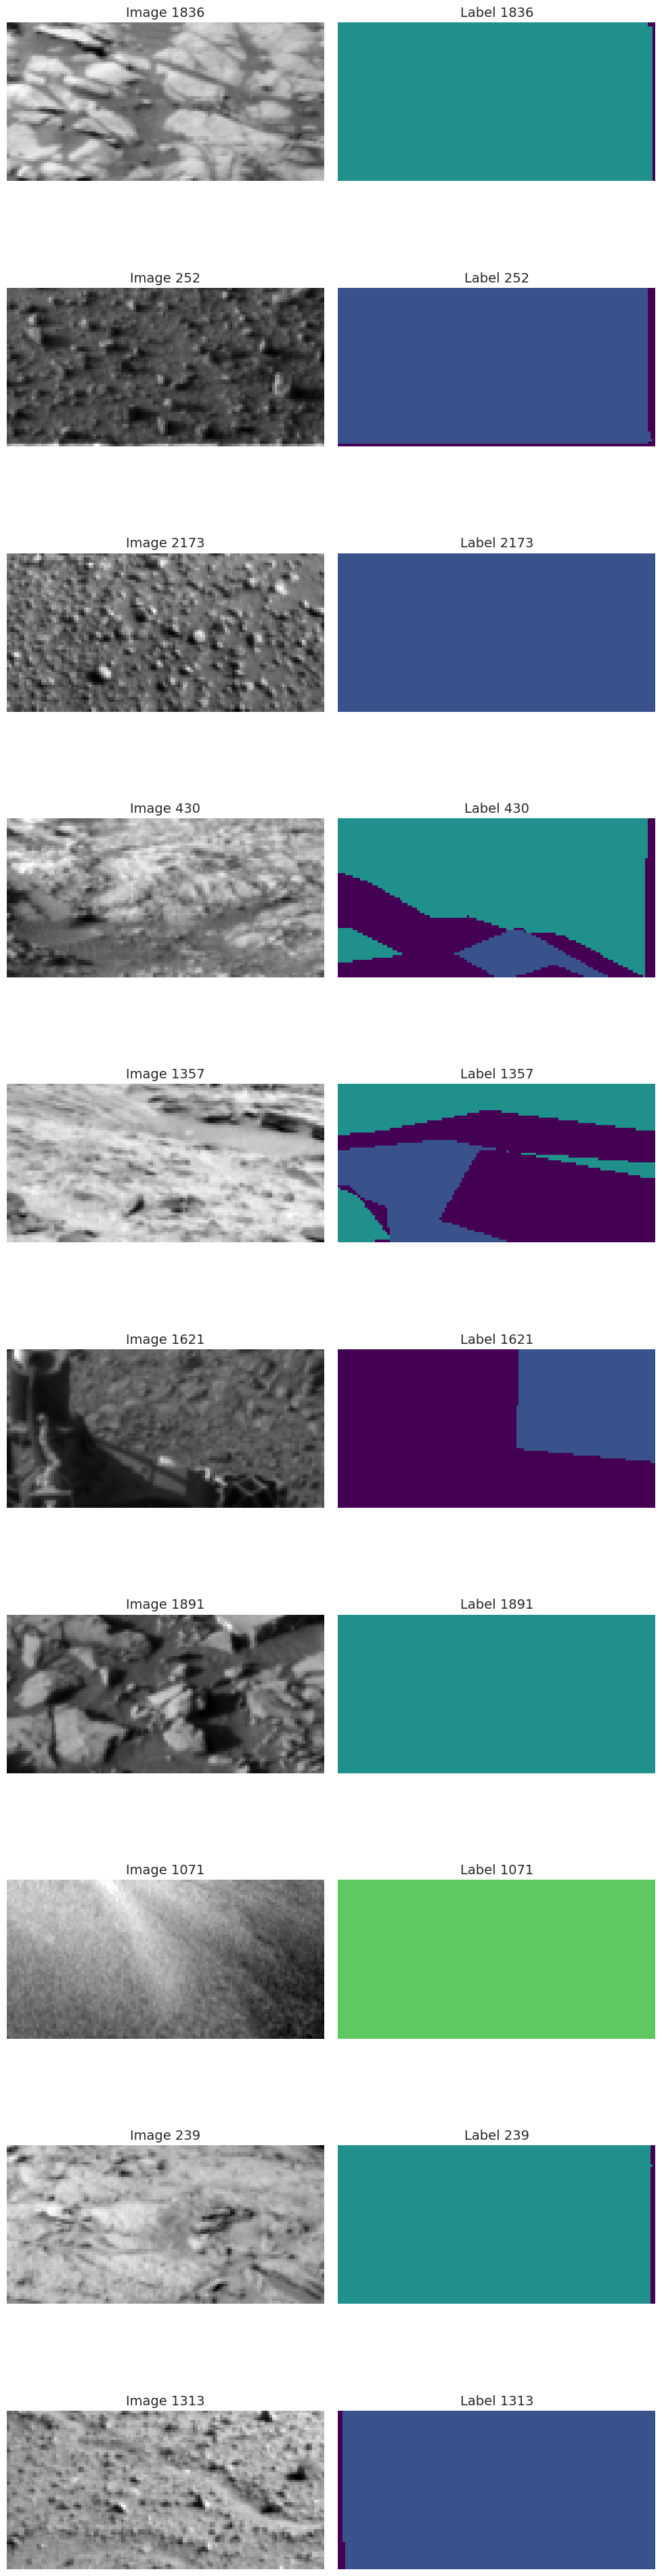

In [ ]:
import numpy as np

import matplotlib.pyplot as plt


#def visualize_images(X, y, num_images, random=False):



def visualize_random_images(X_train, y_train, num_images=10):

    """

    Visualizza immagini casuali dal dataset e stampa il numero della riga.



    Args:

        X_train (numpy array): Dataset di immagini (es. (2615, 64, 128, 1)).

        y_train (numpy array): Dataset di label (es. (2615, 64, 128, 1)).

        num_images (int): Numero di immagini da visualizzare.

    """

    # Ottieni 10 indici casuali senza ripetizioni

    random_indices = np.random.choice(X_train.shape[0], num_images, replace=False)



    # Crea una figura per visualizzare immagini su righe separate

    plt.figure(figsize=(10, num_images * 4))  # Altezza proporzionale al numero di immagini



    for i, idx in enumerate(random_indices):

        # Estrai immagine e label

        image = X_train[idx].squeeze()  # Rimuovi l'asse dei canali

        label = y_train[idx].squeeze()



        # Mostra l'immagine

        plt.subplot(num_images, 2, i * 2 + 1)

        plt.imshow(image, cmap="gray")

        plt.title(f"Image {idx}", fontsize=14)

        plt.axis('off')



        # Mostra la label corrispondente

        plt.subplot(num_images, 2, i * 2 + 2)

        display_label(label)

        plt.title(f"Label {idx}", fontsize=14)

        plt.axis('off')



    plt.tight_layout()

    plt.show()



# Esempio di utilizzo

visualize_random_images(X_train, y_train, num_images=10)



#image 152,142, sotto sopra



#image 450 verso destra



#image426 #verso normale












In [ ]:
import numpy as np

import matplotlib.pyplot as plt



def find_and_plot_images_with_same_label(X_train, y_train, reference_idx, max_plot=20):

    """

    Trova e plotta le immagini che hanno una label identica a quella dell'immagine di riferimento.



    Args:

        X_train (numpy array): Dataset di immagini (es. (2615, 64, 128, 1)).

        y_train (numpy array): Dataset di label (es. (2615, 64, 128, 1)).

        reference_idx (int): Indice dell'immagine di riferimento.

        max_plot (int): Numero massimo di immagini da plottare.



    Returns:

        count (int): Numero di immagini con la stessa label.

        identical_label_indices (list): Indici delle immagini con la stessa label.

    """

    reference_label = y_train[reference_idx]  # Label di riferimento



    # Trova gli indici delle immagini con la stessa label

    identical_label_indices = [i for i in range(len(y_train)) if np.array_equal(y_train[i], reference_label)]

    count = len(identical_label_indices)



    # Plotta fino a `max_plot` immagini con la stessa label

    num_to_plot = min(count, max_plot)

    plt.figure(figsize=(15, num_to_plot * 3))



    """for i, idx in enumerate(identical_label_indices[:num_to_plot]):

        plt.subplot(num_to_plot, 2, 2 * i + 1)

        image = X_train[idx].squeeze()  # Rimuovi il canale per la visualizzazione

        plt.imshow(image, cmap="gray")

        plt.title(f"Image {idx} (Label {reference_idx})", fontsize=14)

        plt.axis('off')



        plt.subplot(num_to_plot, 2, 2 * i + 2)

        label = y_train[idx].squeeze()

        display_label(label)

        plt.title(f"Label {idx}", fontsize=14)

        plt.axis('off')



    plt.tight_layout()

    plt.show()"""



    return count, identical_label_indices



# Usa la funzione per l'immagine 450

reference_idx = 450

count, identical_label_indices = find_and_plot_images_with_same_label(X_train, y_train, reference_idx, max_plot=20)



print(f"Numero di immagini con la stessa label dell'indice {reference_idx}: {count}")

print(f"Indici delle immagini con la stessa label: {identical_label_indices}")


Numero di immagini con la stessa label dell'indice 450: 1
Indici delle immagini con la stessa label: [450]


<Figure size 1500x300 with 0 Axes>

In [ ]:
# se l'utput dell'ultima cella è una singola immagine, significa che non stiamo lavorando con il dataset
# originale ma con quello già filtrato, quindi commento questa cella che eliminerebbe solo la suddetta (povera) immagine
"""import numpy as np



def remove_images_with_same_label(X_train, y_train, reference_idx):

    """ """

    Rimuove tutte le immagini e le label che hanno una label identica a quella di riferimento.



    Args:

        X_train (numpy array): Dataset di immagini (es. (2615, 64, 128, 1)).

        y_train (numpy array): Dataset di label (es. (2615, 64, 128, 1)).

        reference_idx (int): Indice dell'immagine di riferimento.



    Returns:

        X_train_filtered (numpy array): Dataset di immagini filtrato.

        y_train_filtered (numpy array): Dataset di label filtrato.

    """ """

    reference_label = y_train[reference_idx]  # Label di riferimento



    # Crea una maschera booleana per identificare le immagini da tenere

    keep_mask = np.array([

        not np.array_equal(y_train[i], reference_label) for i in range(len(y_train))

    ])



    # Applica la maschera per filtrare X_train e y_train

    X_train_filtered = X_train[keep_mask]

    y_train_filtered = y_train[keep_mask]



    return X_train_filtered, y_train_filtered



# Usa la funzione per rimuovere immagini con la stessa label dell'indice 450

reference_idx = 450

X_train_filtered, y_train_filtered = remove_images_with_same_label(X_train, y_train, reference_idx)



print(f"Shape originale di X_train: {X_train.shape}")

print(f"Shape filtrata di X_train: {X_train_filtered.shape}")


SyntaxError: incomplete input (<ipython-input-73-ff1fc6af6eeb>, line 31)

In [ ]:
#In caso vengano utiizzati anche dopo, ma non mi sembra
X_train_filtered=X_train
y_train_filtered= y_train

## Now let's look for alien machineries

In [ ]:
n_images = 120

images_per_figure = 12
n_figures = n_images // images_per_figure

"""for i in range(n_figures):
    fig, axes = plt.subplots(3, images_per_figure//3, figsize=(20, 10))
    axes = axes.ravel()
    for j in range(images_per_figure):
        if j % 2 == 0:
            idx = i * images_per_figure + j
            axes[j].imshow(X_train_filtered[idx].squeeze(), cmap="gray")
            axes[j].axis("off")
            axes[j].set_title(f"Image {idx}")
        else:
            # Plot label
            idx = i * images_per_figure + j - 1
            display_label(y_train_filtered[idx], ax=axes[j])
            axes[j].axis("off")
            axes[j].set_title(f"Label {idx}")"""


In [ ]:
print(y_train_filtered.shape)

In [ ]:
## Rover is considered part of the background. Let's remove images that are almost entirely made of background
threshold = 0.95
mask = np.sum(y_train_filtered  == 0, axis=(1,2,3)) < threshold * y_train_filtered.shape[1] * y_train_filtered.shape[2]

"""X_train_filtered = X_train_filtered[mask]
y_train_filtered = y_train_filtered[mask]"""

In [ ]:
print(X_train_filtered.shape)

In [ ]:
"""
n_images = 120

images_per_figure = 12
n_figures = n_images // images_per_figure
images_to_plot = range(0, n_images//2).__iter__()

"""
"""for i in range(n_figures):
    fig, axes = plt.subplots(3, images_per_figure//3, figsize=(20, 10))
    axes = axes.ravel()
    for j in range(images_per_figure):
        if j % 2 == 0:
            idx = images_to_plot.__next__()
            axes[j].imshow(X_train_filtered[idx].squeeze(), cmap="gray")
            axes[j].axis("off")
            axes[j].set_title(f"Image {idx}")
        else:
            # Plot label
            display_label(y_train_filtered[idx], ax=axes[j])
            axes[j].axis("off")
            axes[j].set_title(f"Label {idx}")"""


## Now lets oversample class 4, which is very rare

## Do it after the splitting, only on the training to avoid overfitting

In [ ]:
SPLITS_SIZE = 200

# Split the paths (not the data) into training, validation, and test sets

print("Splitting data...")

train_img, val_img, train_lbl, val_lbl = train_test_split(
    X_train, y_train, test_size=SPLITS_SIZE, random_state=seed
)


print("Data splitted!")
print(f"\nNumber of images:")
print(f"Train: {len(train_img)}")
print(f"Validation: {len(val_img)}")
print(f"Test: {len(X_test)}")

Splitting data...
Data splitted!

Number of images:
Train: 2305
Validation: 200
Test: 10022


Distribuzione delle classi:
Classe 0.0: 403180 pixel (24.61%)
Classe 1.0: 524799 pixel (32.03%)
Classe 2.0: 360768 pixel (22.02%)
Classe 3.0: 349268 pixel (21.32%)
Classe 4.0: 385 pixel (0.02%)


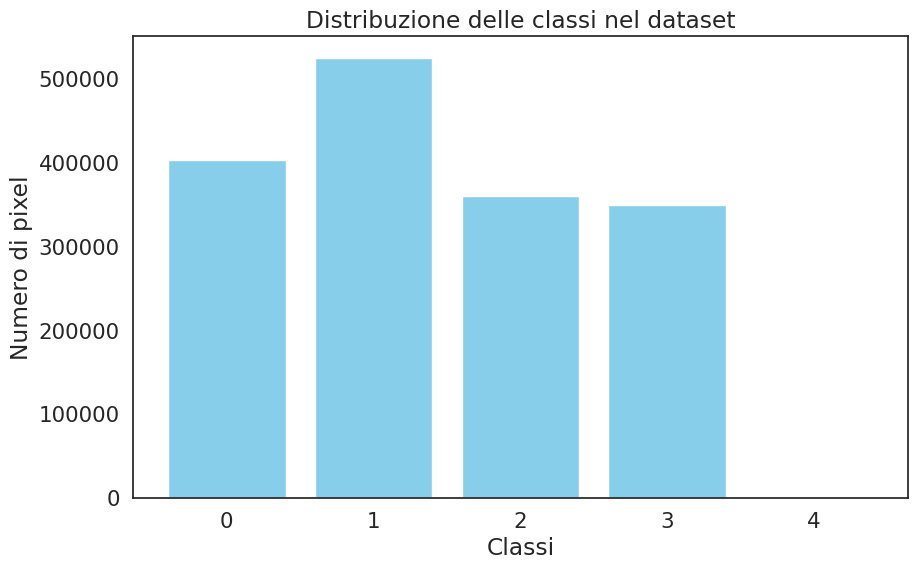

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_class_imbalance(y_train):
    """
    Analizza la distribuzione delle classi nel dataset di label (y_train).

    Args:
        y_train (numpy array): Dataset di label (es. (2615, 64, 128, 1)).

    Returns:
        class_counts (dict): Dizionario con le classi e la frequenza dei pixel.
    """
    # Appiattisci le label per contare i pixel
    y_flat = y_train.flatten()

    # Trova classi uniche e frequenza dei pixel
    unique_classes, pixel_counts = np.unique(y_flat, return_counts=True)

    # Calcola la distribuzione come proporzione
    total_pixels = np.sum(pixel_counts)
    class_distribution = pixel_counts / total_pixels

    # Stampa i risultati
    print("Distribuzione delle classi:")
    for cls, count, proportion in zip(unique_classes, pixel_counts, class_distribution):
        print(f"Classe {cls}: {count} pixel ({proportion:.2%})")

    # Grafico della distribuzione
    plt.figure(figsize=(10, 6))
    plt.bar(unique_classes, pixel_counts, color='skyblue')
    plt.xlabel("Classi")
    plt.ylabel("Numero di pixel")
    plt.title("Distribuzione delle classi nel dataset")
    plt.xticks(unique_classes)
    plt.show()

    # Restituisci i dati della distribuzione
    return dict(zip(unique_classes, pixel_counts))

# Esegui l'analisi sul dataset y_train
class_counts = analyze_class_imbalance(val_lbl)


In [ ]:
# cambio y_train_filtered -> train_lbl

minimum_class4 = 0.01
num_replicas = 10
# Identifica le immagini con la classe minoritaria
mask = np.sum(train_lbl == 4, axis=(1, 2, 3)) > minimum_class4 * train_lbl.shape[1] * train_lbl.shape[2]
print(f"Numero di immagini con classe 4 predominante: {np.sum(mask)}")
# plot all images identified
n_images = np.sum(mask)
images_per_figure = 12
n_figures = int(np.ceil(n_images / images_per_figure))
images_to_plot = np.where(mask)[0].__iter__()

"""for i in range(n_figures):
    fig, axes = plt.subplots(3, images_per_figure//3, figsize=(20, 10))
    axes = axes.ravel()
    for j in range(images_per_figure):
        if j % 2 == 0:
            idx = images_to_plot.__next__()
            axes[j].imshow(X_train_filtered[idx].squeeze(), cmap="gray")
            axes[j].axis("off")
            axes[j].set_title(f"Image {idx}")
        else:
            # Plot label
            display_label(y_train_filtered[idx], ax=axes[j])
            axes[j].axis("off")
            axes[j].set_title(f"Label {idx}")"""

Numero di immagini con classe 4 predominante: 46


'for i in range(n_figures):\n    fig, axes = plt.subplots(3, images_per_figure//3, figsize=(20, 10))\n    axes = axes.ravel()\n    for j in range(images_per_figure):\n        if j % 2 == 0:\n            idx = images_to_plot.__next__()\n            axes[j].imshow(X_train_filtered[idx].squeeze(), cmap="gray")\n            axes[j].axis("off")\n            axes[j].set_title(f"Image {idx}")\n        else:\n            # Plot label\n            display_label(y_train_filtered[idx], ax=axes[j])\n            axes[j].axis("off")\n            axes[j].set_title(f"Label {idx}")'

In [ ]:
# cambio y_train_filtered -> train_lbl
# cambio X_train_filtered -> train_img
# cambio X_train_filtered_with_oversampling -> train_img_aftersplit_oversampling4
# cambio y_train_filtered_with_oversampling -> train_lbl_aftersplit_oversampling4
"""
rotate = tf.keras.layers.RandomRotation(0.1, interpolation="nearest", fill_mode="reflect")

def consistent_rotation(image, label):
    # metti image e label in due canali in modo che le trasformazioni siano consistenti
    superimage = tf.concat([image, label], axis=-1)
    rotated_superimage = rotate(superimage)
    return np.expand_dims(rotated_superimage[:, :, 0], axis=-1), np.expand_dims(rotated_superimage[:, :, 1], axis=-1)

# Funzione per applicare augmentazione sulle immagini e sulle label
def augment_images_and_labels(images, labels, num_replicas):
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images, labels):
        for i in range(num_replicas):
            seed = np.random.randint(0, 10000, size=2)  # Per garantire trasformazioni consistenti
            augmented_img = tf.image.stateless_random_flip_left_right(img, seed=seed)
            augmented_label = tf.image.stateless_random_flip_left_right(label, seed=seed)

            augmented_img = tf.image.stateless_random_flip_up_down(augmented_img, seed=seed)
            augmented_label = tf.image.stateless_random_flip_up_down(augmented_label, seed=seed)
            augmented_img, augmented_label = consistent_rotation(augmented_img, augmented_label)

            augmented_img = tf.image.random_brightness(augmented_img, max_delta=0.2)

            # NOTA: Per le maschere non usiamo trasformazioni continue come brightness o contrast
            augmented_images.append(augmented_img)
            augmented_labels.append(augmented_label)
    return np.array(augmented_images), np.array(augmented_labels)

In [ ]:
def calculate_centroid(mask):
    """
    Calcola il centroide di una maschera binaria.
    Args:
        mask (np.array): Maschera binaria con 1 per i pixel della classe target.
    Returns:
        tuple: Coordinata del centroide (x, y) o None se non ci sono pixel della classe target.
    """
    indices = np.argwhere(mask)  # Trova gli indici dei pixel della classe target
    if indices.size == 0:       # Se non ci sono pixel, ritorna None
        return None
    centroid = np.mean(indices, axis=0)  # Calcola la media delle coordinate (x, y)
    return tuple(centroid)



def crop_and_resize(image, label, centroid, crop_fraction=0.5):
    """
    Ritaglia l'immagine e la maschera attorno al centroide e le ridimensiona alla dimensione originale.

    Args:
        image (np.array): Immagine originale (H, W, C).
        label (np.array): Maschera originale (H, W).
        centroid (tuple): Coordinata del centroide (x, y).
        crop_fraction (float): Frazione della dimensione originale da mantenere nel ritaglio.

    Returns:
        resized_image (np.array): Immagine ridimensionata.
        resized_label (np.array): Maschera ridimensionata.
    """
    if centroid is None:
        # Se il centroide non esiste, ritorna l'immagine e la maschera originali
        return image, label

    # Dimensioni originali
    H, W = image.shape[:2]

    # Dimensioni della nuova immagine
    H_new = int(crop_fraction * H)
    W_new = int(crop_fraction * W)

    # Centroid coordinates
    x_c, y_c = int(centroid[0]), int(centroid[1])

    # Calcola i bordi del ritaglio
    x_min = max(0, x_c - H_new // 2)
    x_max = min(H, x_c + H_new // 2)
    y_min = max(0, y_c - W_new // 2)
    y_max = min(W, y_c + W_new // 2)

    # Esegui il ritaglio
    cropped_image = image[x_min:x_max, y_min:y_max]
    cropped_label = label[x_min:x_max, y_min:y_max]

    # Ridimensiona alla dimensione originale
    resized_image = tf.image.resize(cropped_image, (H, W), method='bilinear')
    resized_label = tf.image.resize(cropped_label, (H, W), method='nearest')  # Per la maschera usiamo nearest

    return resized_image, resized_label

def augment_images_and_labels(images, labels, num_replicas):
    augmented_images = []
    augmented_labels = []
    centroids_class_4 = []  # Lista per salvare i centroidi della classe 4

    for img, label in zip(images, labels):
        # Converte immagine e label in float32
        img = tf.cast(img, dtype=tf.float32)
        label = tf.cast(label, dtype=tf.float32)

        # Calcolo del centroide della classe 4
        class_4_mask = (label == 4)  # Maschera binaria per i pixel della classe 4
        centroid = calculate_centroid(class_4_mask)
        centroids_class_4.append(centroid)

        # Ritaglio e ridimensionamento attorno al centroide
        img, label = crop_and_resize(img, label, centroid)

        for i in range(num_replicas):
            seed = np.random.randint(0, 10000, size=2)  # Per garantire trasformazioni consistenti
            augmented_img = tf.image.stateless_random_flip_left_right(img, seed=seed)
            augmented_label = tf.image.stateless_random_flip_left_right(label, seed=seed)

            augmented_img = tf.image.stateless_random_flip_up_down(augmented_img, seed=seed)
            augmented_label = tf.image.stateless_random_flip_up_down(augmented_label, seed=seed)
            augmented_img, augmented_label = consistent_rotation(augmented_img, augmented_label)

            augmented_img = tf.image.random_brightness(augmented_img, max_delta=0.2)

            # NOTA: Per le maschere non usiamo trasformazioni continue come brightness o contrast
            augmented_images.append(augmented_img)
            augmented_labels.append(augmented_label)

    return np.array(augmented_images), np.array(augmented_labels)


[0. 2. 3. 4.]
Nuova dimensione del dataset:
Immagini: (2765, 64, 128, 1)
Etichette: (2765, 64, 128, 1)


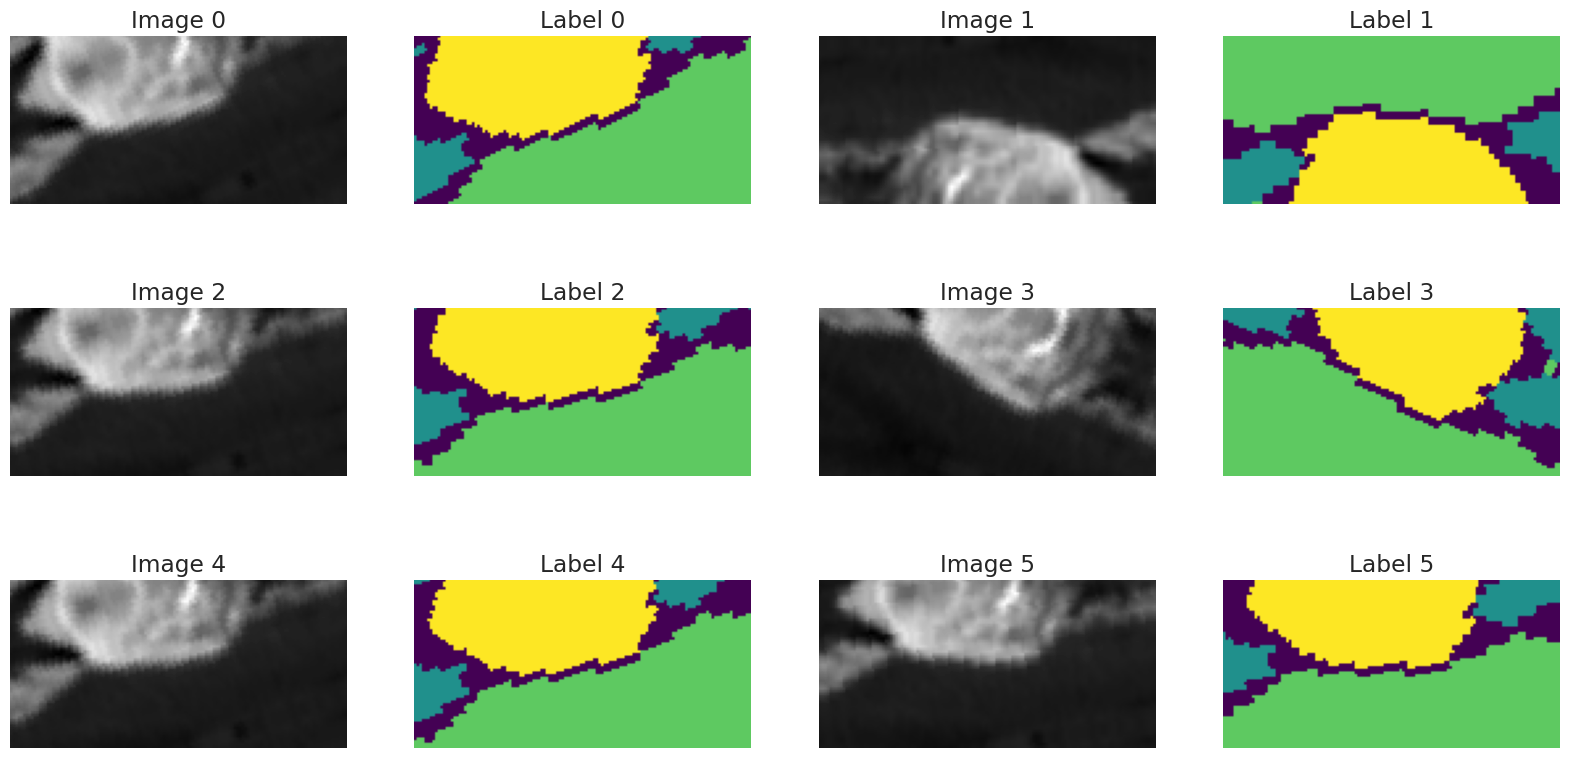

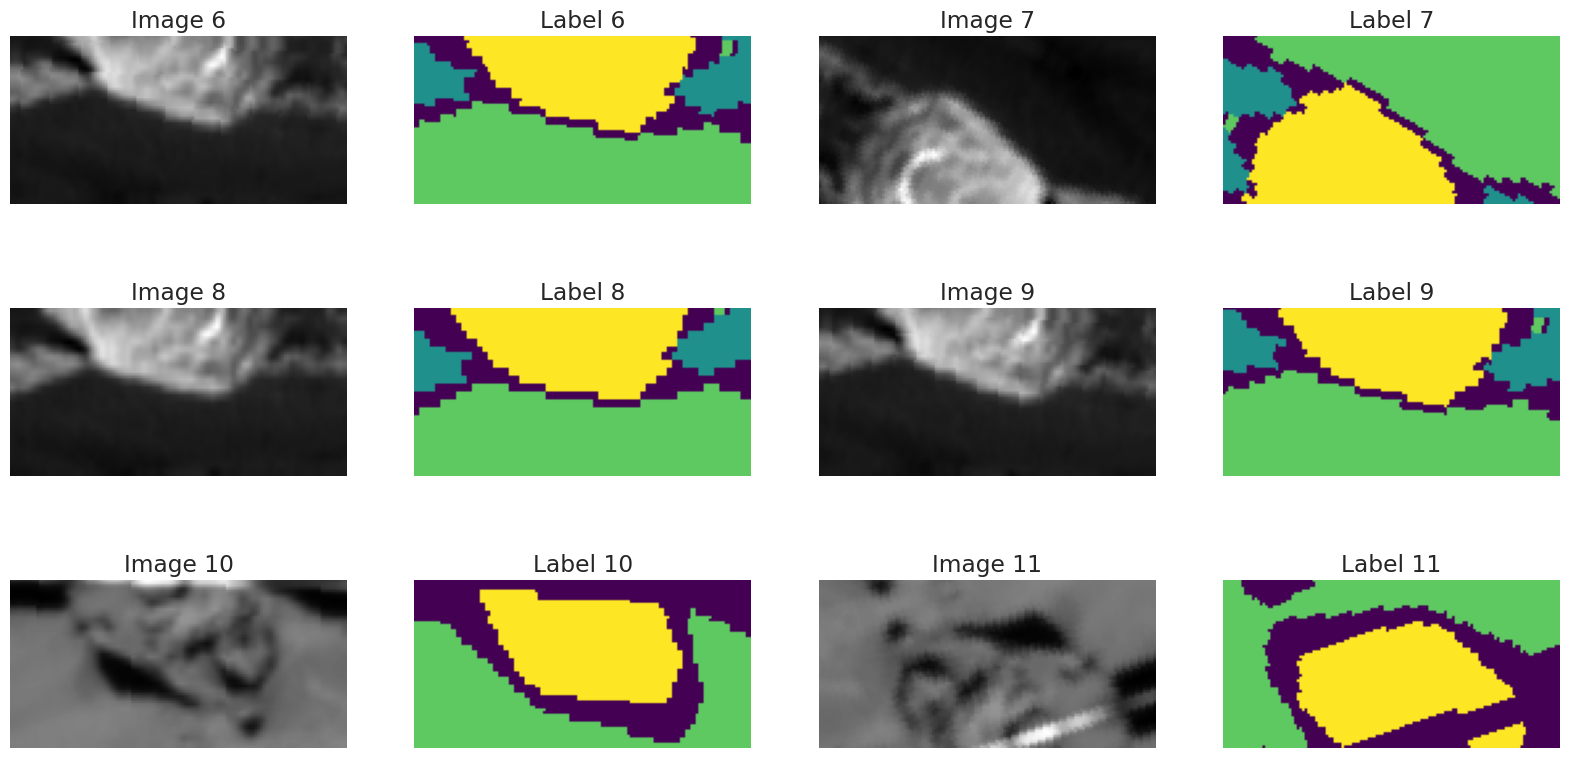

In [ ]:
# Augmenta le immagini e le label
to_replicate = train_img[mask]
to_replicate_labels = train_lbl[mask]
augmented_images, augmented_labels = augment_images_and_labels(to_replicate, to_replicate_labels, num_replicas)

# plottiamo un po di immagini aumentate
n_images = 24
images_per_figure = 12
n_figures = n_images // images_per_figure
images_to_plot = range(0, n_images+0).__iter__()

print(np.unique(augmented_labels[0].squeeze()))
for i in range(n_figures):
    fig, axes = plt.subplots(3, images_per_figure//3, figsize=(20, 10))
    axes = axes.ravel()
    for j in range(images_per_figure):
        if j % 2 == 0:
            idx = images_to_plot.__next__()
            axes[j].imshow(augmented_images[idx].squeeze(), cmap="gray")
            axes[j].axis("off")
            axes[j].set_title(f"Image {idx}")
        else:
            # Plot label
            display_label(augmented_labels[idx], ax=axes[j])
            axes[j].axis("off")
            axes[j].set_title(f"Label {idx}")

# Concatenazione delle immagini e delle label originali con quelle augmentate
train_img_aftersplit_oversampling4 = np.concatenate([train_img, augmented_images], axis=0)
train_lbl_aftersplit_oversampling4 = np.concatenate([train_lbl, augmented_labels], axis=0)

print("Nuova dimensione del dataset:")
print("Immagini:", train_img_aftersplit_oversampling4.shape)
print("Etichette:", train_lbl_aftersplit_oversampling4.shape)

## Save modified dataset

In [ ]:
"""
os.makedirs("data/preprocessed", exist_ok=True)
# save .npy files
x_train_filtered = np.squeeze(X_train_filtered, axis=-1)
y_train_filtered = np.squeeze(y_train_filtered, axis=-1)
print(x_train_filtered.shape)
print(y_train_filtered.shape)
training_set_filtered = np.zeros((x_train_filtered.shape[0], 2, x_train_filtered.shape[1], x_train_filtered.shape[2]))
training_set_filtered[:, 0] = x_train_filtered
training_set_filtered[:, 1] = y_train_filtered
print(training_set_filtered.shape)
np.save("data/preprocessed/training_set_no-bg.npy", training_set_filtered)

SyntaxError: incomplete input (<ipython-input-80-aba24e9be878>, line 1)

In [ ]:
"""
# save .npy files
X_train_filtered_with_oversampling = np.squeeze(X_train_filtered_with_oversampling, axis=-1)
y_train_filtered_with_oversampling = np.squeeze(y_train_filtered_with_oversampling, axis=-1)
print(X_train_filtered_with_oversampling.shape)
print(y_train_filtered_with_oversampling.shape)
training_set_filtered_with_oversampling = np.zeros((X_train_filtered_with_oversampling.shape[0], 2, X_train_filtered_with_oversampling.shape[1], X_train_filtered_with_oversampling.shape[2]))
training_set_filtered_with_oversampling[:, 0] = X_train_filtered_with_oversampling
training_set_filtered_with_oversampling[:, 1] = y_train_filtered_with_oversampling
print(training_set_filtered_with_oversampling.shape)
np.save("data/preprocessed/training_set_oversampling.npy", training_set_filtered_with_oversampling)

In [ ]:
# save .npy files
# cambio X_train_filtered_with_oversampling -> train_img_aftersplit_oversampling4
# cambio y_train_filtered_with_oversampling -> train_lbl_aftersplit_oversampling4
# cambio training_set_filtered_with_oversampling -> training_set_aftersplit_oversampling4

# salvo anche val_img e val_lbl in validation_set_aftersplit

train_img_aftersplit_oversampling4 = np.squeeze(train_img_aftersplit_oversampling4, axis=-1)
train_lbl_aftersplit_oversampling4 = np.squeeze(train_lbl_aftersplit_oversampling4, axis=-1)
val_img = np.squeeze(val_img, axis=-1)
val_lbl = np.squeeze(val_lbl, axis=-1)

print(train_img_aftersplit_oversampling4.shape)
print(train_lbl_aftersplit_oversampling4.shape)
print(val_img.shape)
print(val_lbl.shape)

training_set_aftersplit_oversampling4 = np.zeros((train_img_aftersplit_oversampling4.shape[0], 2, train_img_aftersplit_oversampling4.shape[1], train_img_aftersplit_oversampling4.shape[2]))
training_set_aftersplit_oversampling4[:, 0] = train_img_aftersplit_oversampling4
training_set_aftersplit_oversampling4[:, 1] = train_lbl_aftersplit_oversampling4
validation_set_aftersplit = np.zeros((val_img.shape[0], 2, val_img.shape[1], val_img.shape[2]))
validation_set_aftersplit[:,0] = val_img
validation_set_aftersplit[:,1] = val_lbl

print(training_set_aftersplit_oversampling4.shape)
print(validation_set_aftersplit.shape)
np.save("data/preprocessed/training_set_aftersplit_oversampling_crop4.npy", training_set_aftersplit_oversampling4)
np.save("data/preprocessed/validation_set_aftersplit_crop.npy", validation_set_aftersplit)

(2765, 64, 128)
(2765, 64, 128)
(200, 64, 128)
(200, 64, 128)
(2765, 2, 64, 128)
(200, 2, 64, 128)


In [ ]:
print(training_set_aftersplit_oversampling4.shape)
print(validation_set_aftersplit.shape)